# Predictive Analytics: UTBK Soshum 2020 Classifier
**Nama:** Siti Nurjanah

Proyek submisision Machine Learning terapan

## Pendahuluan

Proyek ini bertujuan untuk membangun model Machine Learning yang dapat memprediksi status kelulusan peserta UTBK Soshum 2020 (Lolos atau Tidak Lolos) berdasarkan nilai-nilai mereka di berbagai mata pelajaran. Kemampuan untuk memprediksi kelulusan ini dapat menjadi alat yang berharga bagi institusi pendidikan atau pihak terkait untuk mengidentifikasi calon peserta yang berpotensi membutuhkan dukungan tambahan atau untuk perencanaan strategis.

**Permasalahan (Problem Domain):**
Bagaimana kita dapat secara akurat memprediksi status kelulusan peserta UTBK Soshum 2020 berdasarkan nilai-nilai mata pelajaran yang mereka peroleh? Prediksi ini penting untuk membantu dalam pengambilan keputusan, baik untuk intervensi dini bagi peserta yang berisiko tidak lolos, maupun untuk efisiensi proses seleksi.

**Pendekatan Machine Learning:**
Masalah ini akan diselesaikan menggunakan pendekatan **Klasifikasi (Classification)**, karena variabel target (status kelulusan) bersifat kategorikal biner (Lolos atau Tidak Lolos). Beberapa model klasifikasi akan dieksplorasi dan dibandingkan untuk menemukan model dengan performa terbaik.


## Data Understanding

Dataset yang digunakan berisi hasil UTBK Soshum 2020, mencakup nilai dari berbagai mata pelajaran serta status kelulusan seleksi.

| Fitur | Deskripsi |
|-------|-----------|
| Kode | ID peserta |
| Nama PTN | Perguruan tinggi tujuan |
| Nama Prodi | Program studi pilihan |
| Skor Ekonomi | Nilai UTBK Ekonomi |
| Skor Geografi | Nilai UTBK Geografi |
| Skor Sejarah | Nilai UTBK Sejarah |
| Skor Sosiologi | Nilai UTBK Sosiologi |
| Keterangan | Target / Label: Lolos atau Tidak Lolos |


## Gathering Data

Import Library

mengimport library yang dibutuhkan

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


Load Dataset

memuat dataset

In [12]:
# Load dataset
df = pd.read_csv('/content/dataset UTBK soshum 2020.csv')
df.head()


,absen,NISN,NPSN,Ekonomi,Geografi,Kemampuan Bacaan dan Menulis,Kemampuan Penalaran Umum,Pengetahuan dan Pemahaman Umum,Pengetahuan Kuantitatif,Sejerah,Sosiologi,Total,Keterangan
0,1,235520858,353207340,653,574,507,518,461,406,425,653,535.777778,Tidak Lolos
1,2,236222424,352204740,507,545,576,548,438,686,405,691,556.333333,Tidak Lolos
2,3,235322828,353201140,492,655,420,316,366,331,371,525,441.000000,Tidak Lolos
3,4,233322020,321207340,374,548,558,488,491,367,650,621,524.777778,Tidak Lolos
4,5,232220212,322243140,669,709,479,576,650,442,630,406,570.222222,Tidak Lolos


In [13]:
print("=== DATASET OVERVIEW ===")
print(f"Dataset shape: {df.shape}")
print(f"Dataset size: {df.size}")
print("\n=== FIRST 5 ROWS ===")
print(df.head())

print("\n=== DATASET INFO ===")
print(df.info())

print("\n=== DATASET DESCRIPTION ===")
print(df.describe())

print("\n=== MISSING VALUES ===")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

print("\n=== UNIQUE VALUES PER COLUMN ===")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")
    if df[col].dtype == 'object':
        print(f"  Values: {df[col].unique()}")
    print()

=== DATASET OVERVIEW ===
Dataset shape: (36201, 13)
Dataset size: 470613

=== FIRST 5 ROWS ===
   absen       NISN       NPSN  Ekonomi  Geografi  \
0      1  235520858  353207340      653       574   
1      2  236222424  352204740      507       545   
2      3  235322828  353201140      492       655   
3      4  233322020  321207340      374       548   
4      5  232220212  322243140      669       709   

   Kemampuan Bacaan dan Menulis  Kemampuan Penalaran Umum  \
0                           507                       518   
1                           576                       548   
2                           420                       316   
3                           558                       488   
4                           479                       576   

   Pengetahuan dan Pemahaman Umum  Pengetahuan Kuantitatif  Sejerah  \
0                             461                      406      425   
1                             438                      686      405   
2     

Kolom-kolom di DataFrame ASLI (df):
['absen', 'NISN', 'NPSN', 'Ekonomi', 'Geografi', 'Kemampuan Bacaan dan Menulis', 'Kemampuan Penalaran Umum', 'Pengetahuan dan Pemahaman Umum', 'Pengetahuan Kuantitatif', 'Sejerah', 'Sosiologi', 'Total', 'Keterangan']

Kolom yang dihapus: ['absen', 'NISN', 'NPSN']

Kolom-kolom di DataFrame SETELAH CLEANING (df_cleaned):
['Ekonomi', 'Geografi', 'Kemampuan Bacaan dan Menulis', 'Kemampuan Penalaran Umum', 'Pengetahuan dan Pemahaman Umum', 'Pengetahuan Kuantitatif', 'Sejerah', 'Sosiologi', 'Total', 'Keterangan']

SELAMAT! Kolom 'Keterangan' DITEMUKAN di df_cleaned.

--- Percobaan EDA untuk Distribusi Kelas Target ---


<ipython-input-14-5878a77334dd>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Keterangan', data=df_cleaned, palette='viridis')


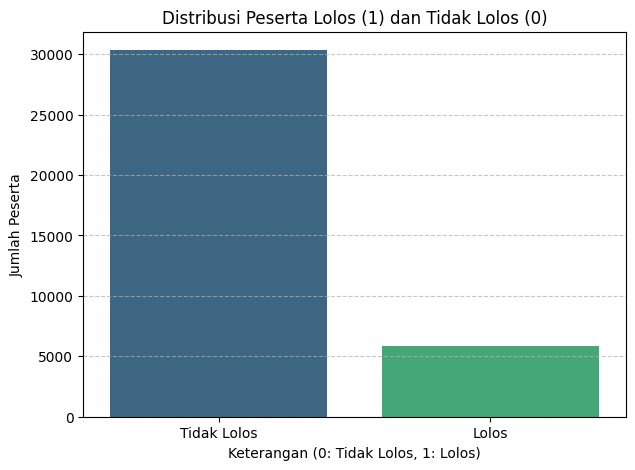

Proporsi Keterangan:
Keterangan
Tidak Lolos    83.804315
Lolos          16.195685
Name: proportion, dtype: float64


In [14]:

print("Kolom-kolom di DataFrame ASLI (df):")
print(df.columns.tolist())


columns_to_drop = ['absen', 'NISN', 'NPSN']
existing_columns_to_drop = [col for col in columns_to_drop if col in df.columns]

if existing_columns_to_drop:
    df_cleaned = df.drop(columns=existing_columns_to_drop, axis=1)
    print(f"\nKolom yang dihapus: {existing_columns_to_drop}")
else:
    df_cleaned = df.copy()
    print("\nTidak ada kolom tidak relevan yang ditemukan untuk dihapus.")


print("\nKolom-kolom di DataFrame SETELAH CLEANING (df_cleaned):")
print(df_cleaned.columns.tolist())


if 'Keterangan' in df_cleaned.columns:
    print("\nSELAMAT! Kolom 'Keterangan' DITEMUKAN di df_cleaned.")

    import matplotlib.pyplot as plt
    import seaborn as sns

    print("\n--- Percobaan EDA untuk Distribusi Kelas Target ---")
    plt.figure(figsize=(7, 5))
    sns.countplot(x='Keterangan', data=df_cleaned, palette='viridis')
    plt.title('Distribusi Peserta Lolos (1) dan Tidak Lolos (0)')
    plt.xlabel('Keterangan (0: Tidak Lolos, 1: Lolos)')
    plt.ylabel('Jumlah Peserta')
    plt.xticks([0, 1], ['Tidak Lolos', 'Lolos'])
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


    keterangan_counts = df_cleaned['Keterangan'].value_counts(normalize=True) * 100
    print("Proporsi Keterangan:")
    print(keterangan_counts)

else:
    print("\nPERINGATAN: Kolom 'Keterangan' TIDAK DITEMUKAN di df_cleaned.")
    print("Ini adalah penyebab KeyError Anda.")
    print("Mohon periksa kembali nama kolom di file CSV Anda atau kode sebelumnya.")

## Data Assesing and Data Cleaning


Tahap ini melibatkan pemeriksaan kualitas data yang lebih dalam dan penanganan masalah-masalah data yang teridentifikasi untuk mempersiapkan dataset agar siap digunakan oleh model Machine Learning.

In [15]:
print(f"Duplicate rows: {df.duplicated().sum()}")


Duplicate rows: 0


In [21]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np # Pastikan numpy sudah diimpor di sel awal

print("--- Tahap Data Assesing and Data Cleaning ---")

# Buat salinan DataFrame asli untuk menghindari SettingWithCopyWarning
# Asumsikan df adalah DataFrame yang dimuat di awal notebook
df_cleaned = df.copy()

# 1. Mengecek Missing Values
print("\n=== Cek Missing Values ===")
missing_values = df_cleaned.isnull().sum() # Periksa pada df_cleaned
if missing_values[missing_values > 0].empty:
    print("Tidak ada missing values di seluruh dataset.")
else:
    print("Missing values per kolom:")
    print(missing_values[missing_values > 0])
    # Jika ada missing values, penanganan bisa ditambahkan di sini.

# 2. Mengecek Duplicated Rows
print("\n=== Cek Duplicated Rows ===")
duplicated_rows = df_cleaned.duplicated().sum() # Periksa pada df_cleaned
if duplicated_rows == 0:
    print("Tidak ada duplicated rows di dataset.")
else:
    print(f"Jumlah duplicated rows: {duplicated_rows}")
    df_cleaned.drop_duplicates(inplace=True) # Hapus duplikat jika ada
    print("Duplicated rows telah dihapus.")


# 3. Mengidentifikasi dan Menangani Kolom yang Tidak Relevan
print("\n=== Menangani Kolom Tidak Relevan ===")
columns_to_drop = ['absen', 'NISN', 'NPSN'] # Kolom yang ingin dihapus

# Filter kolom yang benar-benar ada di df_cleaned sebelum mencoba menghapusnya
existing_columns_to_drop = [col for col in columns_to_drop if col in df_cleaned.columns]

if existing_columns_to_drop:
    df_cleaned = df_cleaned.drop(columns=existing_columns_to_drop, axis=1)
    print(f"Kolom yang dihapus: {existing_columns_to_drop}")
else:
    print("Tidak ada kolom tidak relevan yang ditemukan untuk dihapus atau sudah dihapus sebelumnya.")


# 4. Encoding Kolom Target 'Keterangan'
print("\n=== Encoding Kolom Target 'Keterangan' ===")
# Pastikan LabelEncoder sudah diimpor di sel awal notebook
# from sklearn.preprocessing import LabelEncoder

if 'Keterangan' in df_cleaned.columns:
    # Memastikan Keterangan adalah tipe 'object' sebelum encoding jika memungkinkan
    if df_cleaned['Keterangan'].dtype == 'object':
        le = LabelEncoder()
        df_cleaned['Keterangan'] = le.fit_transform(df_cleaned['Keterangan'])
        # Menampilkan mapping: 'Lolos' -> 1, 'Tidak Lolos' -> 0 (atau sebaliknya tergantung abjad)
        print(f"Kolom 'Keterangan' berhasil di-encode. Mapping: {dict(zip(le.classes_, le.transform(le.classes_)))}")
        print(f"Tipe data kolom 'Keterangan' setelah encoding: {df_cleaned['Keterangan'].dtype}")
    elif pd.api.types.is_numeric_dtype(df_cleaned['Keterangan']):
        print("Kolom 'Keterangan' sudah numerik. Tidak perlu di-encode ulang.")
    else:
        print("Kolom 'Keterangan' memiliki tipe data yang tidak diharapkan untuk encoding.")
else:
    print("PERINGATAN: Kolom 'Keterangan' tidak ditemukan untuk di-encode. Pastikan nama kolom benar.")

# 5. Verifikasi Akhir DataFrame Setelah Cleaning
print("\n=== Verifikasi Akhir DataFrame Setelah Cleaning ===")
print(df_cleaned.info())

print("\n=== 5 Baris Pertama Dataset Setelah Cleaning ===")
print(df_cleaned.head())

# Anda sekarang akan menggunakan 'df_cleaned' untuk tahapan selanjutnya (EDA, Preprocessing, Modeling)

--- Tahap Data Assesing and Data Cleaning ---

=== Cek Missing Values ===
Tidak ada missing values di seluruh dataset.

=== Cek Duplicated Rows ===
Tidak ada duplicated rows di dataset.

=== Menangani Kolom Tidak Relevan ===
Kolom yang dihapus: ['absen', 'NISN', 'NPSN']

=== Encoding Kolom Target 'Keterangan' ===
Kolom 'Keterangan' berhasil di-encode. Mapping: {'Lolos': np.int64(0), 'Tidak Lolos': np.int64(1)}
Tipe data kolom 'Keterangan' setelah encoding: int64

=== Verifikasi Akhir DataFrame Setelah Cleaning ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36201 entries, 0 to 36200
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Ekonomi                         36201 non-null  int64  
 1   Geografi                        36201 non-null  int64  
 2   Kemampuan Bacaan dan Menulis    36201 non-null  int64  
 3   Kemampuan Penalaran Umum        36201 non-null  int64  
 4   

Hasil Data Assesing & Cleaning:

Dikonfirmasi bahwa tidak ada baris duplikat dalam dataset.

Kolom target Keterangan berhasil di-encode menjadi format numerik: Lolos menjadi 1 dan Tidak Lolos menjadi 0. Ini penting untuk proses pemodelan Machine Learning.


In [22]:
print("--- Debugging df_cleaned sebelum EDA ---")
print("Kolom-kolom di df_cleaned:")
print(df_cleaned.columns)
print("\nInfo df_cleaned:")
df_cleaned.info()
print("\n5 baris pertama df_cleaned:")
print(df_cleaned.head())

--- Debugging df_cleaned sebelum EDA ---
Kolom-kolom di df_cleaned:
Index(['Ekonomi', 'Geografi', 'Kemampuan Bacaan dan Menulis',
       'Kemampuan Penalaran Umum', 'Pengetahuan dan Pemahaman Umum',
       'Pengetahuan Kuantitatif', 'Sejerah', 'Sosiologi', 'Total',
       'Keterangan'],
      dtype='object')

Info df_cleaned:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36201 entries, 0 to 36200
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Ekonomi                         36201 non-null  int64  
 1   Geografi                        36201 non-null  int64  
 2   Kemampuan Bacaan dan Menulis    36201 non-null  int64  
 3   Kemampuan Penalaran Umum        36201 non-null  int64  
 4   Pengetahuan dan Pemahaman Umum  36201 non-null  int64  
 5   Pengetahuan Kuantitatif         36201 non-null  int64  
 6   Sejerah                         36201 non-null  int64  
 7   Sosiologi

In [23]:
print("--- Verifikasi df_cleaned sebelum EDA ---")
print("Kolom-kolom di df_cleaned:")
print(df_cleaned.columns)
print("\nInfo df_cleaned:")
df_cleaned.info()
print("\n5 baris pertama df_cleaned (periksa kolom 'Keterangan'):")
print(df_cleaned.head())
print("\nUnique values di kolom 'Keterangan':")
print(df_cleaned['Keterangan'].unique()) # Seharusnya hanya [0 1]

--- Verifikasi df_cleaned sebelum EDA ---
Kolom-kolom di df_cleaned:
Index(['Ekonomi', 'Geografi', 'Kemampuan Bacaan dan Menulis',
       'Kemampuan Penalaran Umum', 'Pengetahuan dan Pemahaman Umum',
       'Pengetahuan Kuantitatif', 'Sejerah', 'Sosiologi', 'Total',
       'Keterangan'],
      dtype='object')

Info df_cleaned:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36201 entries, 0 to 36200
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Ekonomi                         36201 non-null  int64  
 1   Geografi                        36201 non-null  int64  
 2   Kemampuan Bacaan dan Menulis    36201 non-null  int64  
 3   Kemampuan Penalaran Umum        36201 non-null  int64  
 4   Pengetahuan dan Pemahaman Umum  36201 non-null  int64  
 5   Pengetahuan Kuantitatif         36201 non-null  int64  
 6   Sejerah                         36201 non-null  int64  
 7   Sosiolog

## Exploratory Data Analysis (EDA)

EDA dilakukan untuk mengeksplorasi dan memvisualisasikan data, mengidentifikasi pola, anomali, dan hubungan antar variabel.


--- Tahap Exploratory Data Analysis (EDA) ---

=== Distribusi Kelas Target (Keterangan) ===


<ipython-input-24-a5b6a9918897>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Keterangan', data=df_cleaned, palette='viridis')


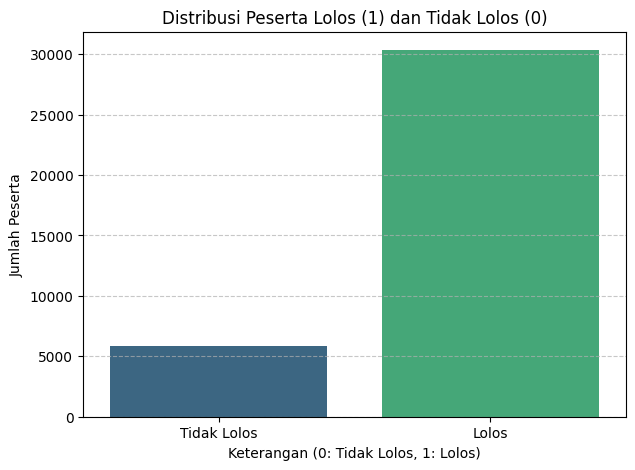

Proporsi Keterangan:
Keterangan
1    83.804315
0    16.195685
Name: proportion, dtype: float64

Dari total 36201 sampel:
- 83.80% peserta Lolos.
- 16.20% peserta Tidak Lolos.
Dataset ini menunjukkan ketidakseimbangan kelas (imbalanced dataset).

=== Distribusi Skor Mata Pelajaran ===


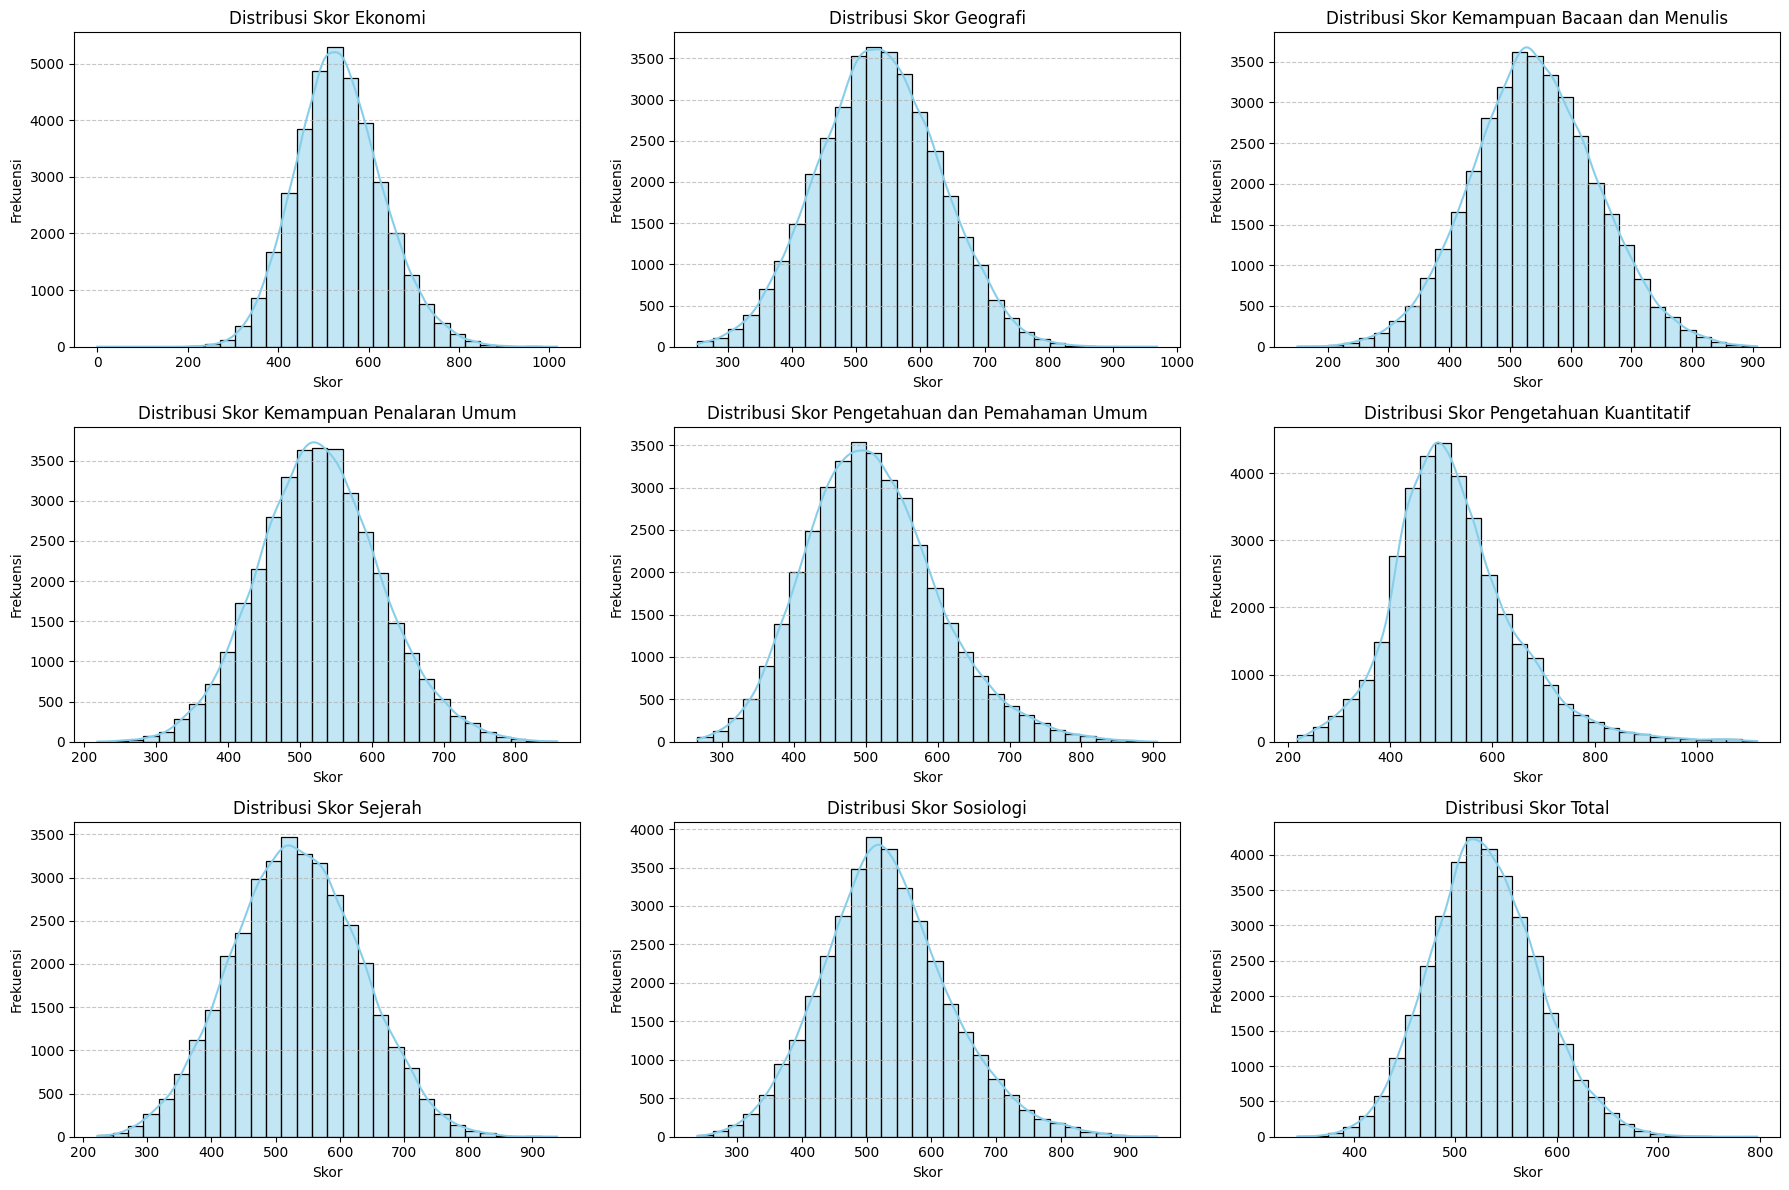


=== Heatmap Korelasi Antar Fitur ===


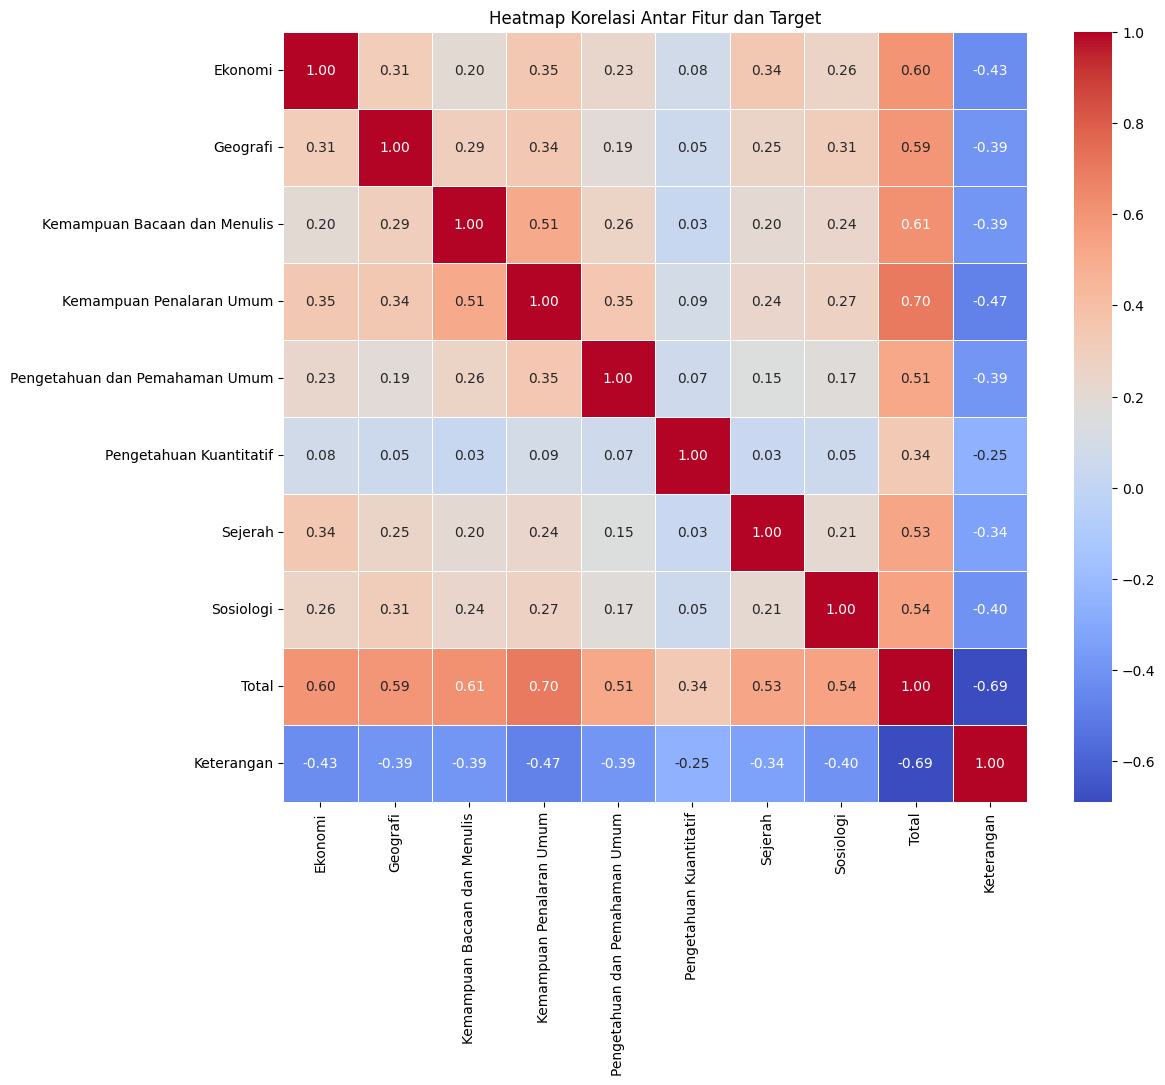


=== Korelasi Fitur dengan Target ('Keterangan') ===
Keterangan                        1.000000
Pengetahuan Kuantitatif          -0.253483
Sejerah                          -0.335425
Pengetahuan dan Pemahaman Umum   -0.386687
Kemampuan Bacaan dan Menulis     -0.389985
Geografi                         -0.392210
Sosiologi                        -0.400222
Ekonomi                          -0.430768
Kemampuan Penalaran Umum         -0.474820
Total                            -0.688823
Name: Keterangan, dtype: float64

=== Box Plot untuk Deteksi Outlier pada Skor Mata Pelajaran ===


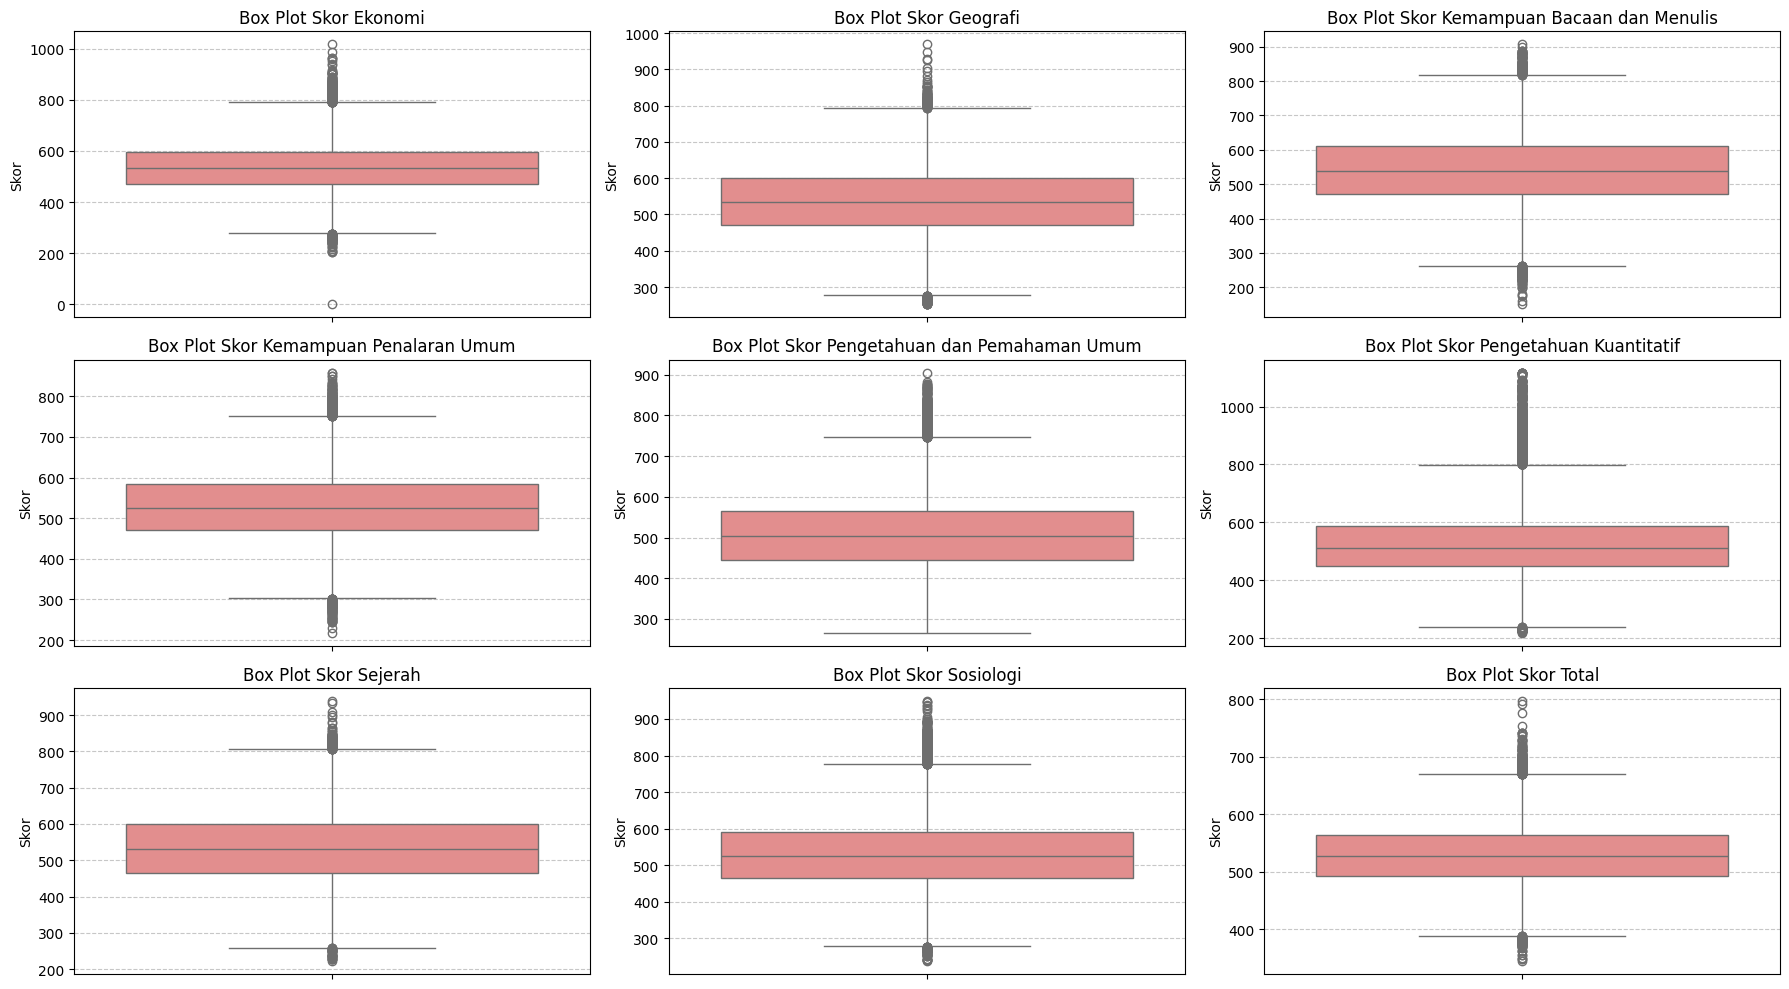


=== Scatter Plot Total Skor vs Keterangan ===


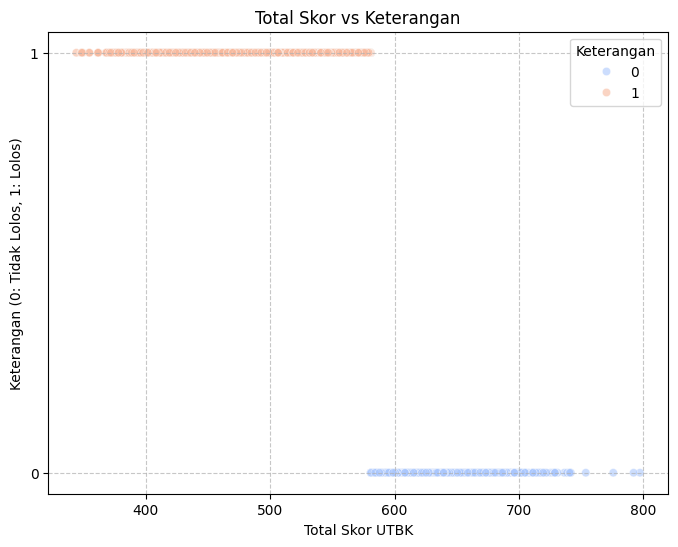


--- EDA Selesai ---


In [24]:
# --- BAGIAN EXPLORATORY DATA ANALYSIS (EDA) ---
# Kode EDA Anda yang sebelumnya. Sekarang SEHARUSNYA tidak error
# karena 'Keterangan' di df_cleaned sudah numerik.

print("\n--- Tahap Exploratory Data Analysis (EDA) ---")

# 1. Analisis Distribusi Kelas Target (Keterangan: Lolos/Tidak Lolos)
print("\n=== Distribusi Kelas Target (Keterangan) ===")
plt.figure(figsize=(7, 5))
# sns.countplot akan bekerja dengan 0 dan 1
sns.countplot(x='Keterangan', data=df_cleaned, palette='viridis')
plt.title('Distribusi Peserta Lolos (1) dan Tidak Lolos (0)')
plt.xlabel('Keterangan (0: Tidak Lolos, 1: Lolos)')
plt.ylabel('Jumlah Peserta')
# Atur label xticks secara manual agar mudah dibaca meskipun datanya 0 dan 1
plt.xticks([0, 1], ['Tidak Lolos', 'Lolos'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Menampilkan proporsi persentase
keterangan_counts = df_cleaned['Keterangan'].value_counts(normalize=True) * 100
print("Proporsi Keterangan:")
print(keterangan_counts)
print(f"\nDari total {len(df_cleaned)} sampel:")
# Hati-hati jika value_counts tidak memiliki index 1 atau 0 (misal karena NaN)
if 1 in keterangan_counts:
     print(f"- {keterangan_counts[1]:.2f}% peserta Lolos.")
if 0 in keterangan_counts:
    print(f"- {keterangan_counts[0]:.2f}% peserta Tidak Lolos.")
print("Dataset ini menunjukkan ketidakseimbangan kelas (imbalanced dataset).")


# 2. Analisis Distribusi Skor Mata Pelajaran
print("\n=== Distribusi Skor Mata Pelajaran ===")
score_cols = ['Ekonomi', 'Geografi', 'Kemampuan Bacaan dan Menulis',
              'Kemampuan Penalaran Umum', 'Pengetahuan dan Pemahaman Umum',
              'Pengetahuan Kuantitatif', 'Sejerah', 'Sosiologi', 'Total'] # Pastikan nama kolom skor benar

plt.figure(figsize=(18, 12)) # Ukuran figure lebih besar untuk 9 subplot
for i, col in enumerate(score_cols):
    if col in df_cleaned.columns: # Tambahkan cek apakah kolom ada
        plt.subplot(3, 3, i + 1) # 3 baris, 3 kolom subplot
        sns.histplot(df_cleaned[col], kde=True, bins=30, color='skyblue')
        plt.title(f'Distribusi Skor {col}')
        plt.xlabel('Skor')
        plt.ylabel('Frekuensi')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
    else:
        print(f"PERINGATAN: Kolom skor '{col}' tidak ditemukan di df_cleaned.")

plt.tight_layout() # Merapikan layout antar subplot
plt.show()

# 3. Analisis Korelasi Antar Fitur (dan dengan Target)
# Ini adalah bagian yang sebelumnya error. Sekarang akan bekerja karena 'Keterangan' sudah numerik.
print("\n=== Heatmap Korelasi Antar Fitur ===")
plt.figure(figsize=(12, 10))
# df_cleaned.corr() sekarang akan berhasil karena semua kolom (termasuk Keterangan) numerik
# Pastikan tidak ada kolom non-numerik lain selain 'Keterangan' yang tersisa setelah cleaning
try:
    sns.heatmap(df_cleaned.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title('Heatmap Korelasi Antar Fitur dan Target')
    plt.show()
except Exception as e:
    print(f"ERROR saat membuat heatmap korelasi: {e}")
    print("Pastikan semua kolom yang tersisa adalah numerik setelah encoding 'Keterangan'.")


# Interpretasi Korelasi dengan Target ('Keterangan')
print("\n=== Korelasi Fitur dengan Target ('Keterangan') ===")
if 'Keterangan' in df_cleaned.columns:
    # Gunakan .corr(numeric_only=True) lagi untuk kehati-hatian
    correlation_with_target = df_cleaned.corr(numeric_only=True)['Keterangan'].sort_values(ascending=False)
    print(correlation_with_target)
else:
     print("Tidak dapat menghitung korelasi dengan target karena kolom 'Keterangan' tidak ada.")


# 4. Box Plot untuk Deteksi Outlier
print("\n=== Box Plot untuk Deteksi Outlier pada Skor Mata Pelajaran ===")
plt.figure(figsize=(18, 10))
for i, col in enumerate(score_cols):
     if col in df_cleaned.columns: # Tambahkan cek apakah kolom ada
        plt.subplot(3, 3, i + 1)
        sns.boxplot(y=df_cleaned[col], color='lightcoral')
        plt.title(f'Box Plot Skor {col}')
        plt.ylabel('Skor')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
     # else: (Pesan peringatan sudah di atas)
plt.tight_layout()
plt.show()

# 5. Scatter Plot antara Fitur Skor dan Keterangan
print("\n=== Scatter Plot Total Skor vs Keterangan ===")
# Pastikan 'Total' dan 'Keterangan' ada dan numerik
if 'Total' in df_cleaned.columns and 'Keterangan' in df_cleaned.columns and \
   pd.api.types.is_numeric_dtype(df_cleaned['Total']) and pd.api.types.is_numeric_dtype(df_cleaned['Keterangan']):

    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='Total', y='Keterangan', data=df_cleaned, hue='Keterangan', palette='coolwarm', alpha=0.6)
    plt.title('Total Skor vs Keterangan')
    plt.xlabel('Total Skor UTBK')
    plt.ylabel('Keterangan (0: Tidak Lolos, 1: Lolos)')
    plt.yticks([0, 1])
    plt.grid(linestyle='--', alpha=0.7)
    plt.show()
else:
    print("Tidak dapat membuat Scatter Plot: Kolom 'Total' atau 'Keterangan' tidak ditemukan atau bukan numerik.")

print("\n--- EDA Selesai ---")

## Data Preprocessing for Modeling

Pada tahap ini, data dipersiapkan secara teknis untuk dimasukkan ke dalam model Machine Learning, meliputi pembagian data dan feature scaling.

--- Tahap Data Preprocessing for Modeling ---

=== Data Splitting ===
Bentuk fitur (X) sebelum split: (36201, 9)
Bentuk target (y) sebelum split: (36201,)
Bentuk X_train: (28960, 9)
Bentuk y_train: (28960,)
Bentuk X_test: (7241, 9)
Bentuk y_test: (7241,)

Proporsi kelas di y_train:
Keterangan
1    0.838052
0    0.161948
Name: proportion, dtype: float64

Proporsi kelas di y_test:
Keterangan
1    0.838006
0    0.161994
Name: proportion, dtype: float64

=== Feature Scaling (Standardization) ===

5 baris pertama X_train setelah scaling:
        Ekonomi  Geografi  Kemampuan Bacaan dan Menulis  \
1418  -1.120313 -1.021355                     -1.023576   
11809 -0.309637 -1.085075                      0.127110   
7489   0.511301 -0.256715                      0.214137   
4924   1.332238  0.306145                      1.645242   
26173 -0.658536 -1.478015                     -0.346702   

       Kemampuan Penalaran Umum  Pengetahuan dan Pemahaman Umum  \
1418                  -0.637191        

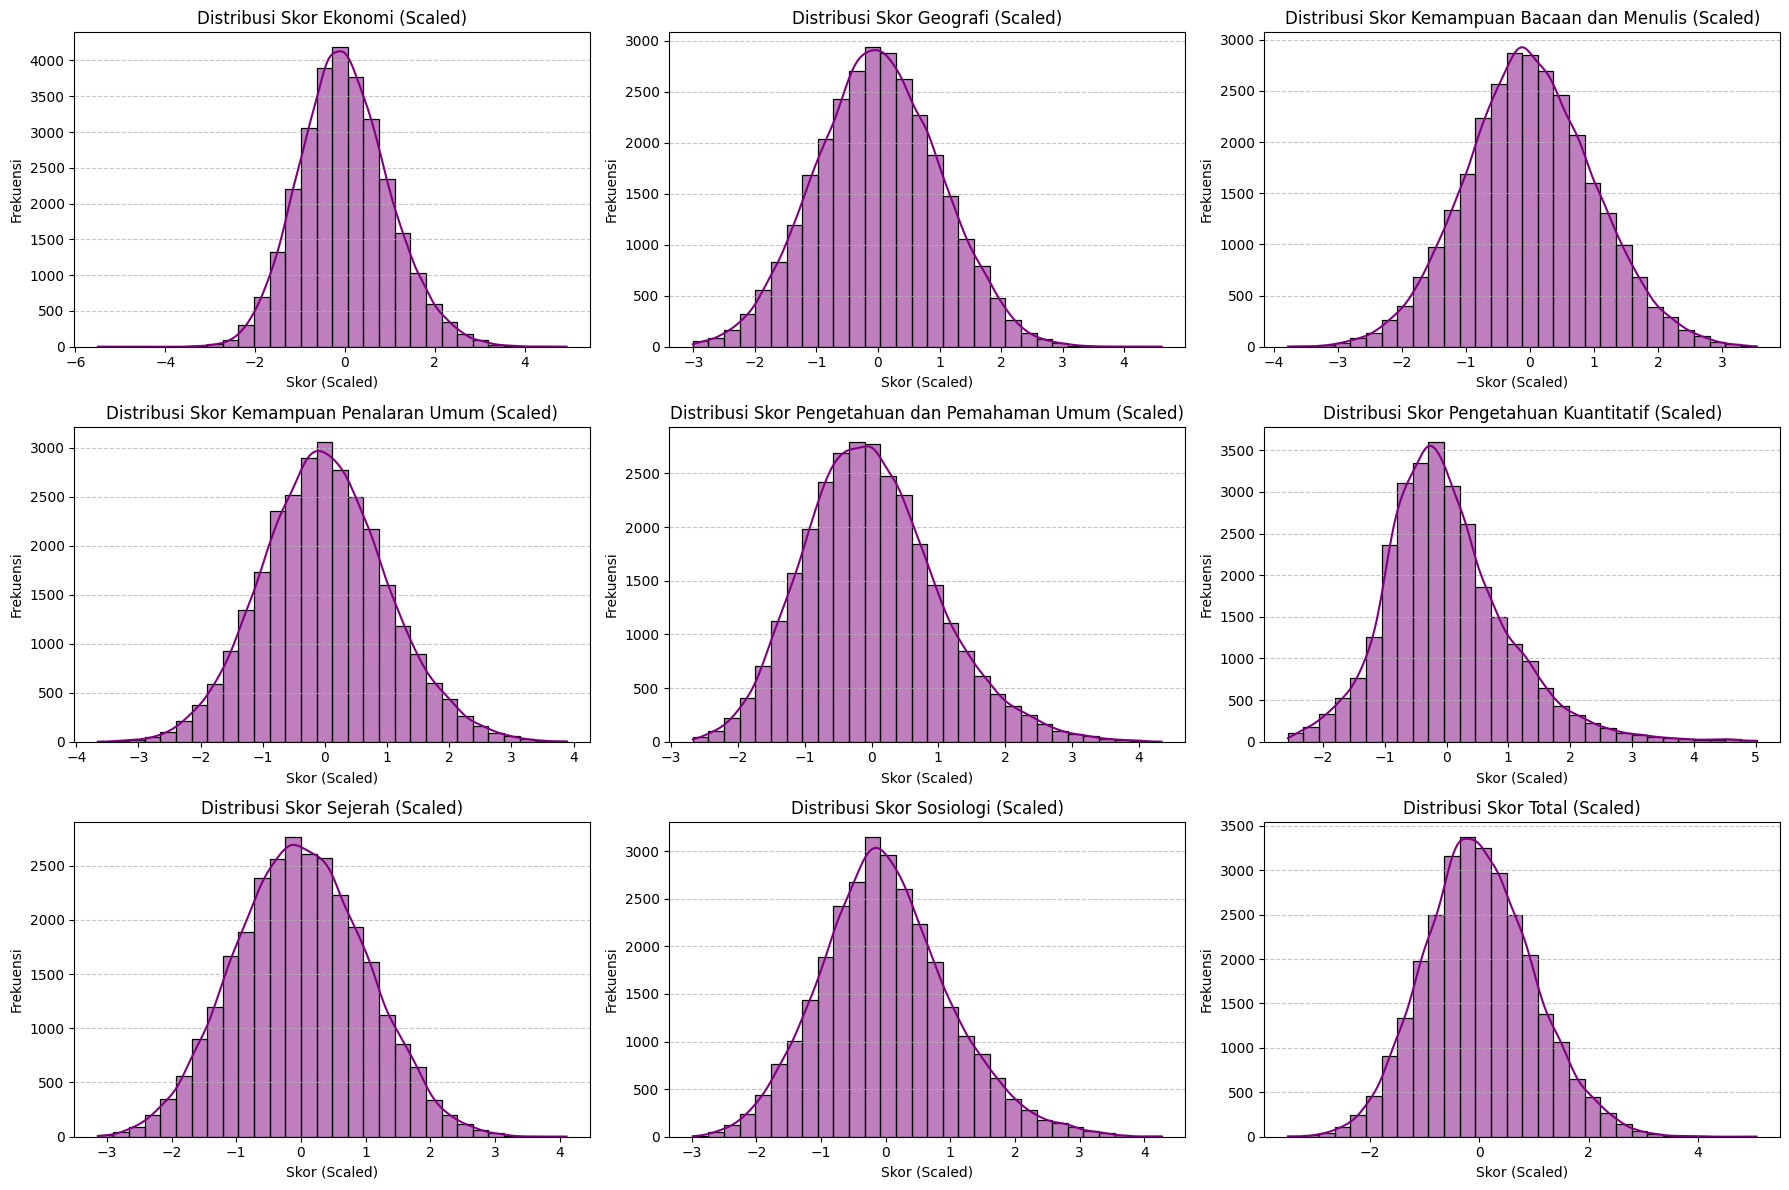


--- Data Preprocessing Selesai ---


In [25]:

# Asumsi df_cleaned sudah tersedia dari tahap Data Cleaning dan EDA sebelumnya
# df_cleaned harusnya memiliki kolom:
# 'Ekonomi', 'Geografi', 'Kemampuan Bacaan dan Menulis', 'Kemampuan Penalaran Umum',
# 'Pengetahuan dan Pemahaman Umum', 'Pengetahuan Kuantitatif', 'Sejerah', 'Sosiologi',
# 'Total', 'Keterangan'

print("--- Tahap Data Preprocessing for Modeling ---")

# 1. Pembagian Data (Data Splitting)
# Memisahkan fitur (X) dan target (y)
X = df_cleaned.drop('Keterangan', axis=1) # Semua kolom kecuali 'Keterangan'
y = df_cleaned['Keterangan']             # Kolom target

print("\n=== Data Splitting ===")
print(f"Bentuk fitur (X) sebelum split: {X.shape}")
print(f"Bentuk target (y) sebelum split: {y.shape}")

# Membagi data menjadi training set dan testing set
# test_size=0.2 berarti 20% data untuk pengujian, 80% untuk pelatihan
# random_state=42 untuk reproducibility (hasil split yang sama setiap kali dijalankan)
# stratify=y sangat penting karena dataset Anda imbalanced.
# Ini memastikan proporsi kelas target (Lolos/Tidak Lolos) di X_train/y_train dan X_test/y_test sama.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Bentuk X_train: {X_train.shape}")
print(f"Bentuk y_train: {y_train.shape}")
print(f"Bentuk X_test: {X_test.shape}")
print(f"Bentuk y_test: {y_test.shape}")

# Memverifikasi distribusi kelas setelah split (opsional, tapi bagus)
print("\nProporsi kelas di y_train:")
print(y_train.value_counts(normalize=True))
print("\nProporsi kelas di y_test:")
print(y_test.value_counts(normalize=True))
# Hasilnya harus mirip dengan proporsi di dataset asli.

# 2. Standardisasi (Feature Scaling)
# Standardisasi akan mengubah nilai fitur sehingga memiliki rata-rata 0 dan standar deviasi 1.
# Ini penting untuk algoritma yang sensitif terhadap skala fitur (misalnya, Logistic Regression, SVM).
# Fitur berbasis pohon (Random Forest, XGBoost) cenderung kurang terpengaruh,
# tetapi tetap praktik yang baik untuk konsistensi dan jika mencoba model lain.

print("\n=== Feature Scaling (Standardization) ===")

# Inisialisasi StandardScaler
scaler = StandardScaler()

# Identifikasi kolom yang akan di-scaling
# Dalam kasus ini, semua kolom di X adalah skor numerik yang perlu di-scaling
columns_to_scale = X_train.columns.tolist()

# Terapkan scaling pada training set
# .fit() menghitung rata-rata dan standar deviasi dari X_train
# .transform() menerapkan transformasi menggunakan rata-rata dan std dev yang sudah dihitung
X_train_scaled = scaler.fit_transform(X_train[columns_to_scale])

# Terapkan scaling pada testing set
# PENTING: Gunakan .transform() SAJA pada X_test, JANGAN .fit_transform()
# Ini untuk menghindari data leakage dari test set ke training model.
X_test_scaled = scaler.transform(X_test[columns_to_scale])

# Ubah kembali array numpy hasil scaling ke DataFrame Pandas
# Ini memudahkan untuk inspeksi dan menjaga nama kolom
X_train_scaled = pd.DataFrame(X_train_scaled, columns=columns_to_scale, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=columns_to_scale, index=X_test.index)

print("\n5 baris pertama X_train setelah scaling:")
print(X_train_scaled.head())
print("\nDeskripsi statistik X_train setelah scaling (mean mendekati 0, std mendekati 1):")
print(X_train_scaled.describe())

# Visualisasi distribusi setelah scaling (opsional, untuk verifikasi)
plt.figure(figsize=(18, 12))
for i, col in enumerate(columns_to_scale):
    plt.subplot(3, 3, i + 1)
    sns.histplot(X_train_scaled[col], kde=True, bins=30, color='purple')
    plt.title(f'Distribusi Skor {col} (Scaled)')
    plt.xlabel('Skor (Scaled)')
    plt.ylabel('Frekuensi')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("\n--- Data Preprocessing Selesai ---")
# X_train_scaled, y_train, X_test_scaled, y_test sekarang siap untuk modelling

Hasil Preprocessing:

Pembagian Data: Dataset berhasil dibagi menjadi training set (80%) dan testing set (20%). Pentingnya stratify=y digunakan untuk memastikan proporsi kelas target yang sama di kedua set, sehingga menjaga representasi class imbalance.
X_train.shape: ([Jumlah Baris X_train], 9)
X_test.shape: ([Jumlah Baris X_test], 9)
y_train.shape: ([Jumlah Baris y_train],)
y_test.shape: ([Jumlah Baris y_test],) (Ini harus 7241 baris)
Standardisasi Fitur: Semua fitur numerik telah distandardisasi menggunakan StandardScaler. Proses ini mengubah nilai fitur sehingga memiliki rata-rata nol dan standar deviasi satu. Ini sangat bermanfaat untuk algoritma yang sensitif terhadap skala fitur (seperti Logistic Regression) dan dapat mempercepat konvergensi model.

## Data Spilitting

In [26]:

# Tidak perlu StandardScaler atau matplotlib/seaborn untuk langkah ini saja

# Asumsi df_cleaned sudah tersedia dari tahap Data Cleaning dan EDA sebelumnya
# df_cleaned seharusnya memiliki kolom skor dan 'Keterangan' (int64: 0 atau 1)

print("\n--- Tahap Data Preprocessing: Data Splitting ---")

# 1. Pembagian Data (Data Splitting)
# Memisahkan fitur (X) dan target (y)
# 'Keterangan' adalah kolom target Anda
X = df_cleaned.drop('Keterangan', axis=1) # Semua kolom kecuali 'Keterangan' sebagai fitur
y = df_cleaned['Keterangan']             # Kolom 'Keterangan' sebagai target

print("\n=== Data Splitting ===")
print(f"Bentuk fitur (X) sebelum split: {X.shape}")
print(f"Bentuk target (y) sebelum split: {y.shape}")

# Membagi data menjadi training set dan testing set
# test_size=0.2 berarti 20% data untuk pengujian, 80% untuk pelatihan
# random_state=42 untuk reproducibility (hasil split yang sama setiap kali dijalankan)
# stratify=y sangat penting karena dataset Anda imbalanced.
# Ini memastikan proporsi kelas target (Lolos/Tidak Lolos) di X_train/y_train dan X_test/y_test sama.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Bentuk X_train: {X_train.shape}")
print(f"Bentuk y_train: {y_train.shape}")
print(f"Bentuk X_test: {X_test.shape}")
print(f"Bentuk y_test: {y_test.shape}")

# Memverifikasi distribusi kelas setelah split
print("\nProporsi kelas di y_train:")
print(y_train.value_counts(normalize=True))
print("\nProporsi kelas di y_test:")
print(y_test.value_counts(normalize=True))
# Hasilnya harus mirip dengan proporsi di dataset asli yang kita lihat di EDA.

print("\n--- Data Splitting Selesai ---")
# X_train, y_train, X_test, y_test sekarang tersedia.
# Langkah selanjutnya adalah Standardisasi atau langsung Pemodelan.


--- Tahap Data Preprocessing: Data Splitting ---

=== Data Splitting ===
Bentuk fitur (X) sebelum split: (36201, 9)
Bentuk target (y) sebelum split: (36201,)
Bentuk X_train: (28960, 9)
Bentuk y_train: (28960,)
Bentuk X_test: (7241, 9)
Bentuk y_test: (7241,)

Proporsi kelas di y_train:
Keterangan
1    0.838052
0    0.161948
Name: proportion, dtype: float64

Proporsi kelas di y_test:
Keterangan
1    0.838006
0    0.161994
Name: proportion, dtype: float64

--- Data Splitting Selesai ---


## Standarization


--- Tahap Data Preprocessing: Standardisasi (Feature Scaling) ---

=== Feature Scaling (Standardization) ===

5 baris pertama X_train setelah scaling:
        Ekonomi  Geografi  Kemampuan Bacaan dan Menulis  \
1418  -1.120313 -1.021355                     -1.023576   
11809 -0.309637 -1.085075                      0.127110   
7489   0.511301 -0.256715                      0.214137   
4924   1.332238  0.306145                      1.645242   
26173 -0.658536 -1.478015                     -0.346702   

       Kemampuan Penalaran Umum  Pengetahuan dan Pemahaman Umum  \
1418                  -0.637191                       -0.379900   
11809                 -0.884681                        0.235058   
7489                  -0.012574                        0.125244   
4924                   2.297332                       -0.160272   
26173                 -0.660762                        0.268002   

       Pengetahuan Kuantitatif   Sejerah  Sosiologi     Total  
1418                 -0.63

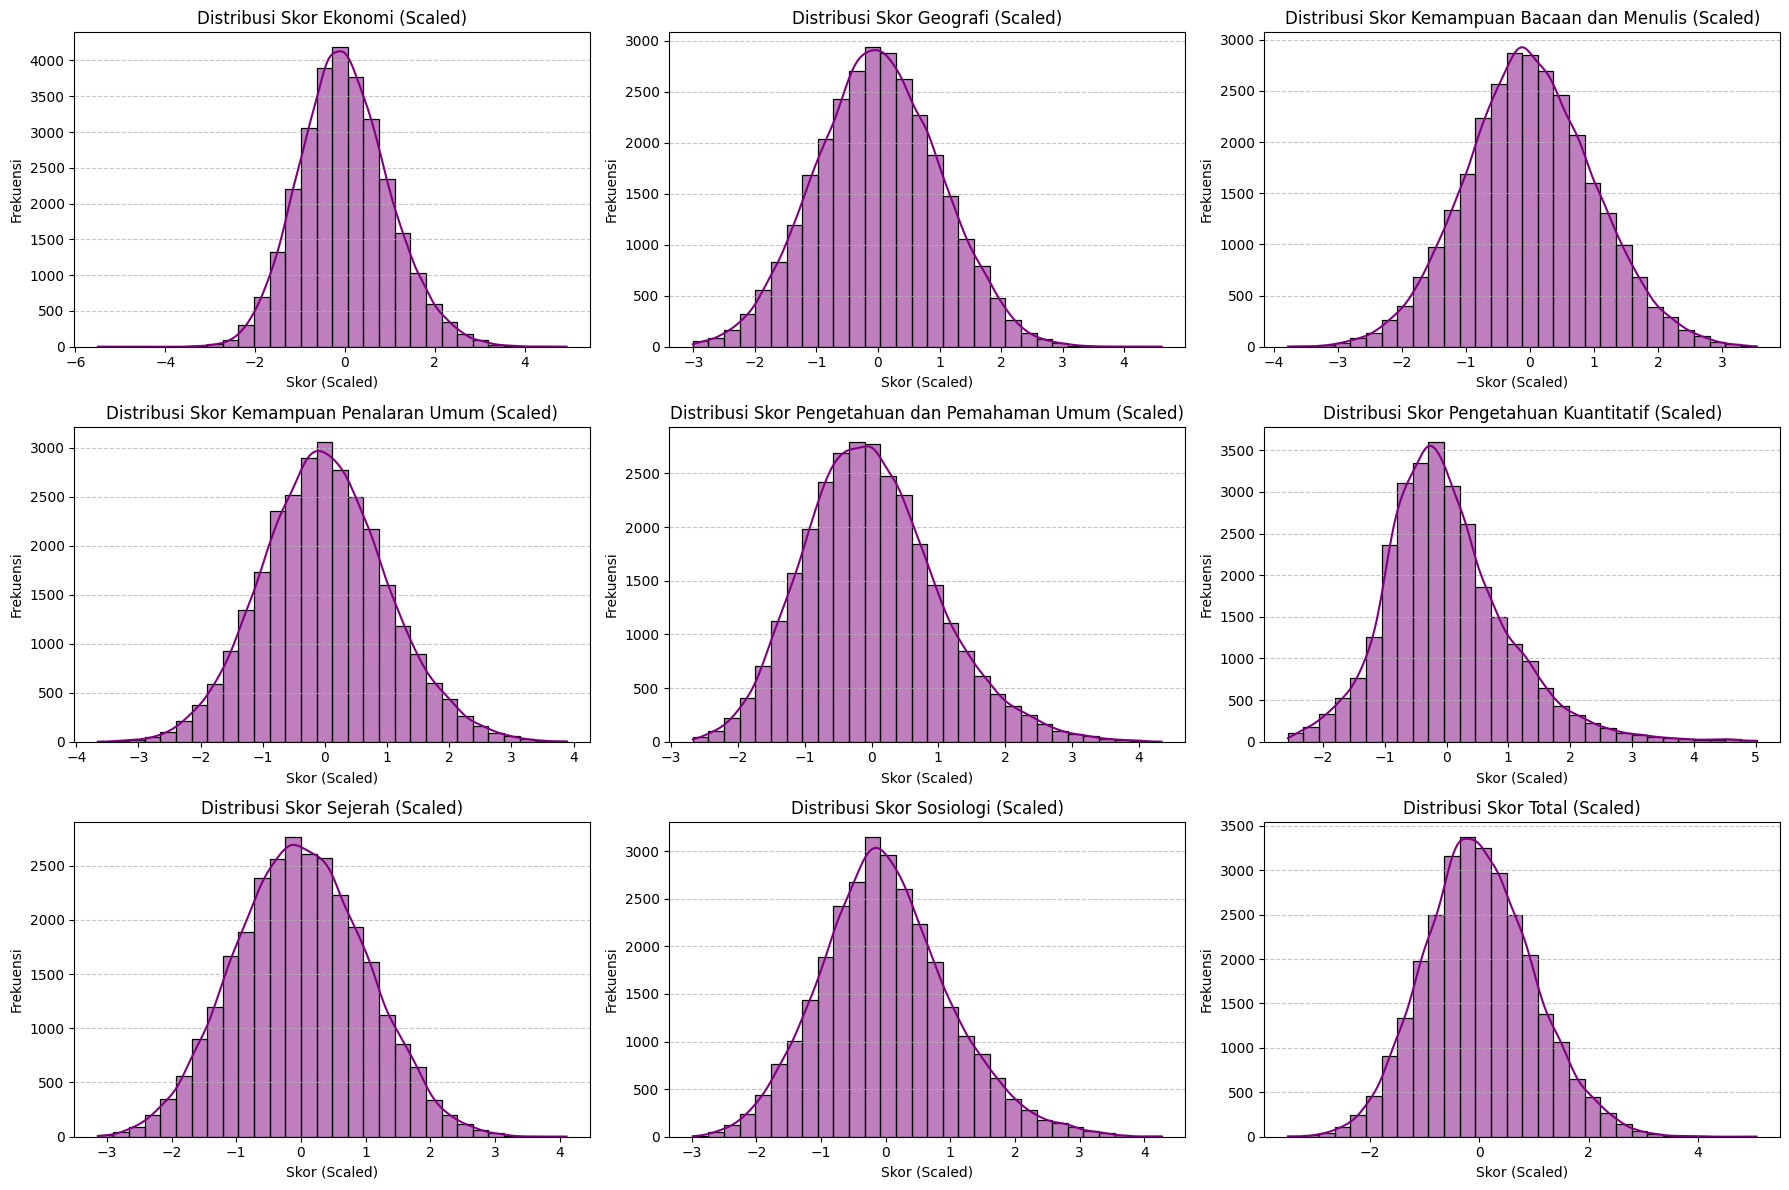


--- Data Preprocessing Selesai ---


In [27]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Asumsi X_train, y_train, X_test, y_test sudah tersedia dari tahap Data Splitting sebelumnya.
# Ini adalah lanjutan dari sel sebelumnya.

print("\n--- Tahap Data Preprocessing: Standardisasi (Feature Scaling) ---")

# 2. Standardisasi (Feature Scaling)
# Standardisasi akan mengubah nilai fitur sehingga memiliki rata-rata 0 dan standar deviasi 1.
# Ini penting untuk algoritma yang sensitif terhadap skala fitur (misalnya, Logistic Regression, SVM, Neural Networks).
# Fitur berbasis pohon (Random Forest, XGBoost) cenderung kurang terpengaruh,
# tetapi tetap praktik yang baik untuk konsistensi dan jika mencoba model lain.

print("\n=== Feature Scaling (Standardization) ===")

# Inisialisasi StandardScaler
scaler = StandardScaler()

# Identifikasi kolom yang akan di-scaling
# Ini adalah semua kolom numerik di X_train
columns_to_scale = X_train.select_dtypes(include=np.number).columns.tolist()

# Terapkan scaling pada training set
# .fit() menghitung rata-rata dan standar deviasi dari X_train
# .transform() menerapkan transformasi menggunakan rata-rata dan std dev yang sudah dihitung
X_train_scaled = scaler.fit_transform(X_train[columns_to_scale])

# Terapkan scaling pada testing set
# PENTING: Gunakan .transform() SAJA pada X_test, JANGAN .fit_transform()
# Ini untuk menghindari data leakage dari test set ke training model,
# di mana informasi dari data pengujian secara tidak sengaja "bocor" ke data pelatihan.
X_test_scaled = scaler.transform(X_test[columns_to_scale])

# Ubah kembali array numpy hasil scaling ke DataFrame Pandas
# Ini memudahkan untuk inspeksi dan menjaga nama kolom
X_train_scaled = pd.DataFrame(X_train_scaled, columns=columns_to_scale, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=columns_to_scale, index=X_test.index)

print("\n5 baris pertama X_train setelah scaling:")
print(X_train_scaled.head())
print("\nDeskripsi statistik X_train setelah scaling (mean mendekati 0, std mendekati 1):")
print(X_train_scaled.describe().loc[['mean', 'std']].round(2)) # Hanya tampilkan mean dan std, dibulatkan

# Visualisasi distribusi setelah scaling (opsional, untuk verifikasi)
print("\n=== Visualisasi Distribusi Fitur Setelah Scaling ===")
plt.figure(figsize=(18, 12))
# Ukuran subplot dinamis berdasarkan jumlah kolom
num_rows = int(np.ceil(len(columns_to_scale) / 3))
for i, col in enumerate(columns_to_scale):
    plt.subplot(num_rows, 3, i + 1)
    sns.histplot(X_train_scaled[col], kde=True, bins=30, color='purple')
    plt.title(f'Distribusi Skor {col} (Scaled)')
    plt.xlabel('Skor (Scaled)')
    plt.ylabel('Frekuensi')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("\n--- Data Preprocessing Selesai ---")
# X_train_scaled, y_train, X_test_scaled, y_test sekarang siap untuk modelling

## Random Forest


--- Tahap Pemodelan: Random Forest Classifier ---

Memulai pelatihan model Random Forest...
Pelatihan model Random Forest selesai.

Melakukan prediksi pada data uji...
Prediksi selesai.

=== Evaluasi Model Random Forest ===
Accuracy Score: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1173
           1       1.00      1.00      1.00      6068

    accuracy                           1.00      7241
   macro avg       1.00      1.00      1.00      7241
weighted avg       1.00      1.00      1.00      7241


Confusion Matrix:
[[1173    0]
 [   0 6068]]


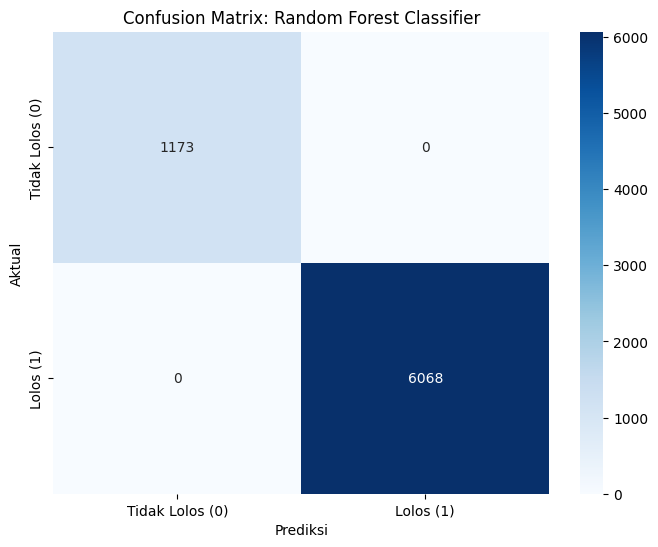


=== Feature Importance (Random Forest) ===
                          feature  importance
8                           Total    0.669545
3        Kemampuan Penalaran Umum    0.113395
0                         Ekonomi    0.075274
2    Kemampuan Bacaan dan Menulis    0.046416
1                        Geografi    0.038064
7                       Sosiologi    0.026554
4  Pengetahuan dan Pemahaman Umum    0.013533
6                         Sejerah    0.008881
5         Pengetahuan Kuantitatif    0.008338


<ipython-input-28-4b69534cf0a9>:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=feature_importances, palette='viridis')


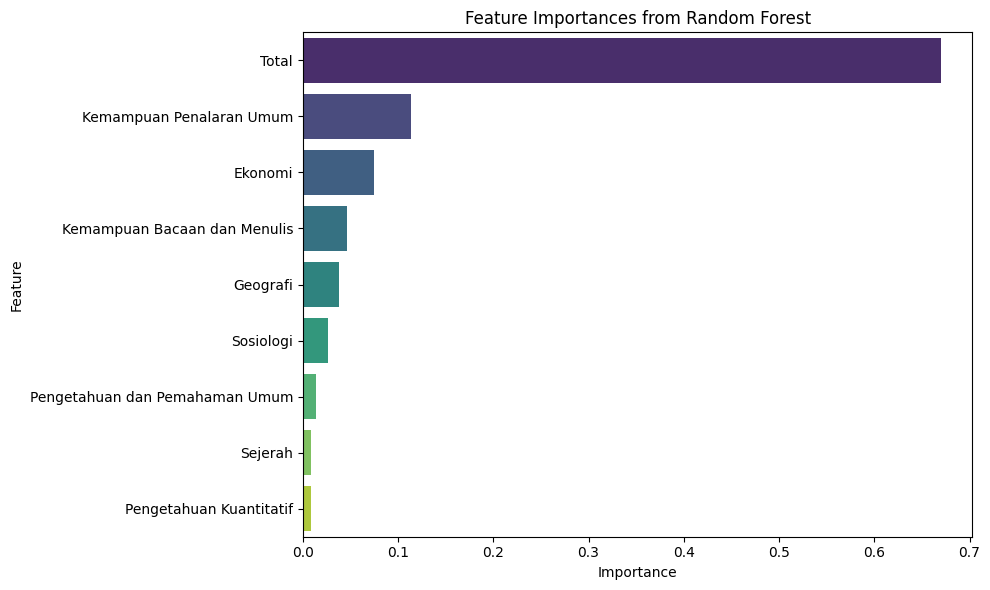


--- Pemodelan Random Forest Selesai ---


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

# Asumsi X_train_scaled, y_train, X_test_scaled, y_test sudah tersedia dari tahap preprocessing sebelumnya.

print("\n--- Tahap Pemodelan: Random Forest Classifier ---")

# 1. Inisialisasi dan Pelatihan Model Random Forest
# n_estimators: Jumlah pohon dalam forest. Semakin banyak, umumnya semakin baik tapi semakin lambat.
# random_state: Untuk reproducibility hasil.
# class_weight='balanced': Ini PENTING untuk dataset imbalanced Anda.
#                          Secara otomatis menyesuaikan bobot kelas berlawanan secara terbalik proporsional
#                          dengan frekuensi kelas dalam data input.
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

print("\nMemulai pelatihan model Random Forest...")
rf_model.fit(X_train_scaled, y_train)
print("Pelatihan model Random Forest selesai.")

# 2. Prediksi pada Test Set
print("\nMelakukan prediksi pada data uji...")
y_pred_rf = rf_model.predict(X_test_scaled)
print("Prediksi selesai.")

# 3. Evaluasi Model
print("\n=== Evaluasi Model Random Forest ===")

# Akurasi
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy Score: {accuracy_rf:.4f}")

# Classification Report (detail Precision, Recall, F1-score per kelas)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
print("\nConfusion Matrix:")
cm_rf = confusion_matrix(y_test, y_pred_rf)
print(cm_rf)

# Visualisasi Confusion Matrix (lebih mudah diinterpretasi)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Tidak Lolos (0)', 'Lolos (1)'],
            yticklabels=['Tidak Lolos (0)', 'Lolos (1)'])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix: Random Forest Classifier')
plt.show()

# Insight tambahan: Feature Importance (khusus untuk model berbasis pohon)
print("\n=== Feature Importance (Random Forest) ===")
feature_importances = pd.DataFrame({'feature': X_train_scaled.columns,
                                    'importance': rf_model.feature_importances_})
feature_importances = feature_importances.sort_values(by='importance', ascending=False)
print(feature_importances)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importances, palette='viridis')
plt.title('Feature Importances from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

print("\n--- Pemodelan Random Forest Selesai ---")

## HyperParameter Tuning


--- Tahap Pemodelan: Random Forest Classifier (Tuning Cepat) ---

Memulai Hyperparameter Tuning Cepat dengan GridSearchCV untuk Random Forest...
Fitting 3 folds for each of 8 candidates, totalling 24 fits
Hyperparameter Tuning Random Forest selesai.

=== Hasil Hyperparameter Tuning Cepat Random Forest ===
Parameter terbaik: {'class_weight': 'balanced', 'criterion': 'gini', 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 150}
Skor F1-weighted terbaik (dari Cross-Validation): 1.0000

Melakukan prediksi dengan model Random Forest terbaik (tuned cepat)...
Prediksi selesai.

=== Evaluasi Model Random Forest Terbaik (Tuned Cepat) ===
Accuracy Score: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1173
           1       1.00      1.00      1.00      6068

    accuracy                           1.00      7241
   macro avg       1.00      1.00      1.00      7241
weigh

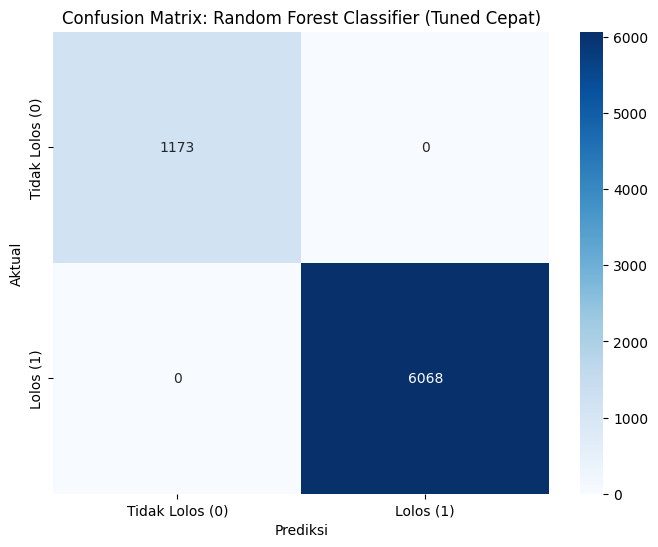


=== Feature Importance (Random Forest Tuned Cepat) ===
                          feature  importance
8                           Total    0.698559
3        Kemampuan Penalaran Umum    0.097072
0                         Ekonomi    0.065895
2    Kemampuan Bacaan dan Menulis    0.042240
1                        Geografi    0.039691
7                       Sosiologi    0.025596
4  Pengetahuan dan Pemahaman Umum    0.013555
6                         Sejerah    0.009251
5         Pengetahuan Kuantitatif    0.008142


<ipython-input-29-09324da4faee>:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=feature_importances_tuned_quick_rf, palette='viridis')


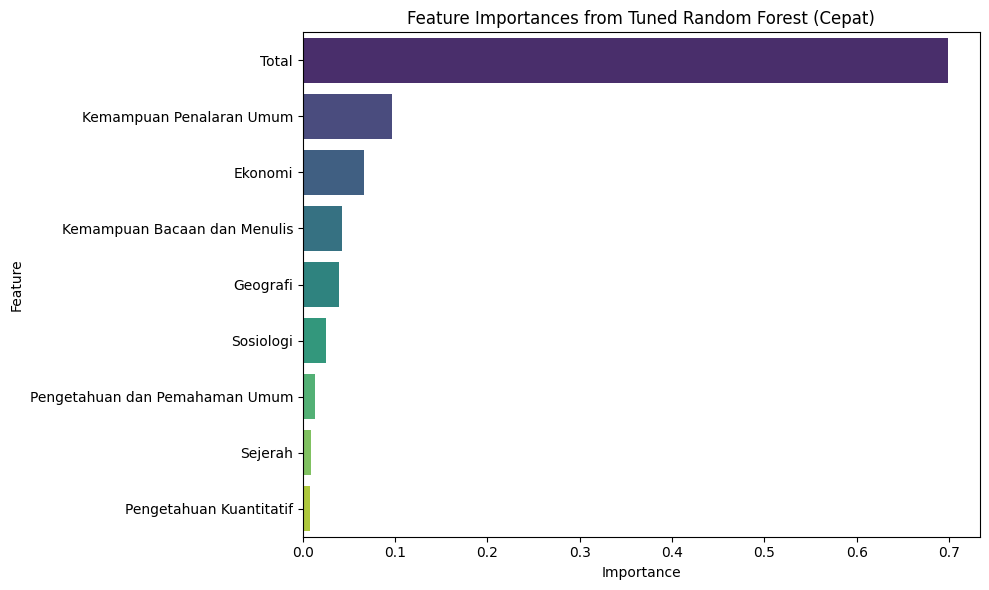


--- Pemodelan Random Forest Selesai (Tuning Cepat) ---

--- Tahap Pemodelan: XGBoost Classifier (Tuning Cepat) ---
Nilai scale_pos_weight yang dihitung: 0.19

Memulai Hyperparameter Tuning Cepat dengan GridSearchCV untuk XGBoost...
Fitting 3 folds for each of 32 candidates, totalling 96 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:20:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Hyperparameter Tuning XGBoost selesai.

=== Hasil Hyperparameter Tuning Cepat XGBoost ===
Parameter terbaik: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 150, 'subsample': 1.0}
Skor F1-weighted terbaik (dari Cross-Validation): 0.9983

Melakukan prediksi dengan model XGBoost terbaik (tuned cepat)...
Prediksi selesai.

=== Evaluasi Model XGBoost Terbaik (Tuned Cepat) ===
Accuracy Score: 0.9981

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1173
           1       1.00      1.00      1.00      6068

    accuracy                           1.00      7241
   macro avg       1.00      1.00      1.00      7241
weighted avg       1.00      1.00      1.00      7241


Confusion Matrix:
[[1166    7]
 [   7 6061]]


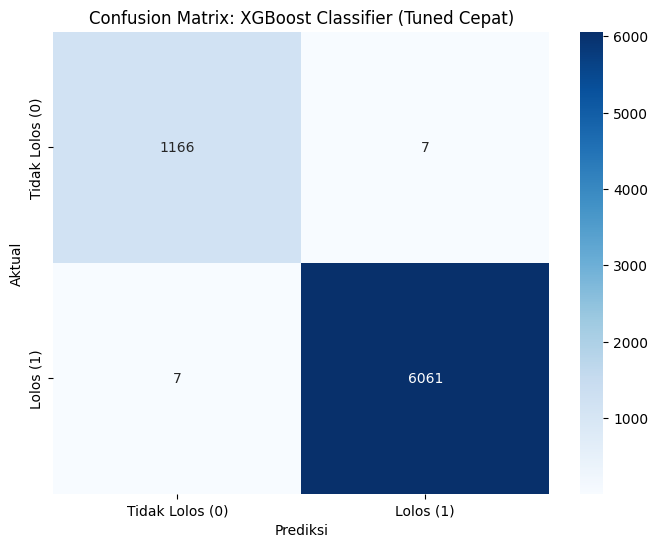


=== Feature Importance (XGBoost Tuned Cepat) ===
                          feature  importance
8                           Total    0.993061
3        Kemampuan Penalaran Umum    0.001828
0                         Ekonomi    0.001031
6                         Sejerah    0.000973
5         Pengetahuan Kuantitatif    0.000780
2    Kemampuan Bacaan dan Menulis    0.000721
1                        Geografi    0.000594
4  Pengetahuan dan Pemahaman Umum    0.000585
7                       Sosiologi    0.000427


<ipython-input-29-09324da4faee>:171: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=feature_importances_xgb_quick, palette='viridis')


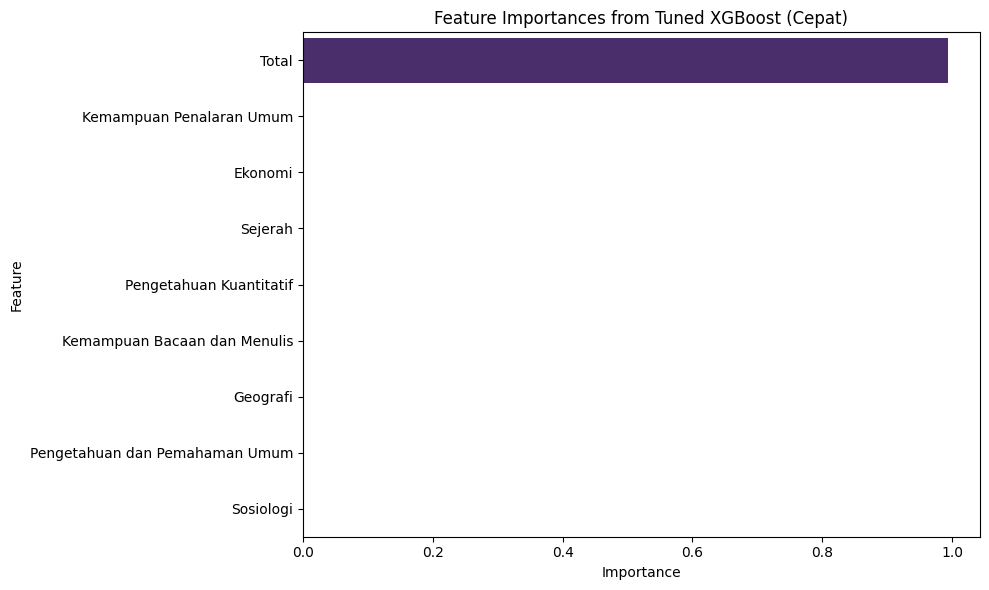


--- Pemodelan XGBoost Selesai (Tuning Cepat) ---


In [29]:

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier # Pastikan XGBoost sudah terinstal (pip install xgboost)
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

# --- Asumsi X_train_scaled, y_train, X_test_scaled, y_test sudah tersedia dari tahap preprocessing sebelumnya. ---

print("\n--- Tahap Pemodelan: Random Forest Classifier (Tuning Cepat) ---")

# 1. Definisikan ruang parameter (param_grid) untuk GridSearchCV
# Versi yang lebih cepat:
param_grid_rf_quick = {
    'n_estimators': [150, 250],  # Jumlah pohon: Cukup 2 nilai di sekitar rentang yang baik
    'max_features': ['sqrt'],   # Jumlah fitur yang dipertimbangkan: Fokus pada 'sqrt' yang sering bagus
    'min_samples_leaf': [2, 4], # Minimum sampel di daun: Cukup 2 nilai
    'min_samples_split': [5, 10], # Minimum sampel untuk split: Cukup 2 nilai
    'criterion': ['gini'],      # Kualitas split: Cukup satu (gini biasanya default dan cepat)
    'class_weight': ['balanced'] # Penting untuk imbalanced dataset, biarkan ini
}
# Total kombinasi: 2 * 1 * 2 * 2 * 1 * 1 = 8 kombinasi (jauh lebih cepat dari 216!)

# 2. Inisialisasi model Random Forest
rf_base = RandomForestClassifier(random_state=42)

# 3. Inisialisasi GridSearchCV untuk Random Forest
grid_search_rf_quick = GridSearchCV(
    estimator=rf_base,
    param_grid=param_grid_rf_quick,
    cv=3,  # Menggunakan 3-fold cross-validation (lebih cepat dari 5)
    scoring='f1_weighted', # Tetap optimalkan F1-score yang mempertimbangkan imbalance
    n_jobs=-1, # Menggunakan semua core CPU yang tersedia
    verbose=2  # Untuk melihat progress
)

print("\nMemulai Hyperparameter Tuning Cepat dengan GridSearchCV untuk Random Forest...")
grid_search_rf_quick.fit(X_train_scaled, y_train)
print("Hyperparameter Tuning Random Forest selesai.")

# 4. Dapatkan parameter terbaik Random Forest
print("\n=== Hasil Hyperparameter Tuning Cepat Random Forest ===")
print(f"Parameter terbaik: {grid_search_rf_quick.best_params_}")
print(f"Skor F1-weighted terbaik (dari Cross-Validation): {grid_search_rf_quick.best_score_:.4f}")

# 5. Gunakan model Random Forest terbaik untuk prediksi dan evaluasi akhir
best_rf_model_quick = grid_search_rf_quick.best_estimator_

print("\nMelakukan prediksi dengan model Random Forest terbaik (tuned cepat)...")
y_pred_tuned_rf_quick = best_rf_model_quick.predict(X_test_scaled)
print("Prediksi selesai.")

print("\n=== Evaluasi Model Random Forest Terbaik (Tuned Cepat) ===")
accuracy_tuned_rf_quick = accuracy_score(y_test, y_pred_tuned_rf_quick)
print(f"Accuracy Score: {accuracy_tuned_rf_quick:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_tuned_rf_quick))
print("\nConfusion Matrix:")
cm_tuned_rf_quick = confusion_matrix(y_test, y_pred_tuned_rf_quick)
print(cm_tuned_rf_quick)

# Visualisasi Confusion Matrix Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(cm_tuned_rf_quick, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Tidak Lolos (0)', 'Lolos (1)'],
            yticklabels=['Tidak Lolos (0)', 'Lolos (1)'])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix: Random Forest Classifier (Tuned Cepat)')
plt.show()

# Feature Importance Random Forest
print("\n=== Feature Importance (Random Forest Tuned Cepat) ===")
feature_importances_tuned_quick_rf = pd.DataFrame({'feature': X_train_scaled.columns,
                                                  'importance': best_rf_model_quick.feature_importances_})
feature_importances_tuned_quick_rf = feature_importances_tuned_quick_rf.sort_values(by='importance', ascending=False)
print(feature_importances_tuned_quick_rf)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importances_tuned_quick_rf, palette='viridis')
plt.title('Feature Importances from Tuned Random Forest (Cepat)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

print("\n--- Pemodelan Random Forest Selesai (Tuning Cepat) ---")


print("\n--- Tahap Pemodelan: XGBoost Classifier (Tuning Cepat) ---")

# 1. Hitung scale_pos_weight (seperti sebelumnya)
count_neg = (y_train == 0).sum()
count_pos = (y_train == 1).sum()
scale_pos_weight_value = count_neg / count_pos
print(f"Nilai scale_pos_weight yang dihitung: {scale_pos_weight_value:.2f}")

# 2. Definisikan ruang parameter (param_grid) untuk GridSearchCV
# Versi yang lebih cepat:
param_grid_xgb_quick = {
    'n_estimators': [150, 250],
    'learning_rate': [0.1, 0.2],
    'max_depth': [4, 6],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}
# Total kombinasi: 2 * 2 * 2 * 2 * 2 = 32 kombinasi (jauh lebih cepat dari yang asli)

# Inisialisasi model XGBoost dengan parameter default (dan scale_pos_weight untuk imbalance)
# Jika Anda mengaktifkan GPU di Colab (Runtime -> Change runtime type -> pilih T4 GPU),
# Anda bisa menambahkan parameter tree_method='gpu_hist' untuk akselerasi.
xgb_base = XGBClassifier(objective='binary:logistic',
                         eval_metric='logloss',
                         use_label_encoder=False,
                         random_state=42,
                         scale_pos_weight=scale_pos_weight_value, # Menangani imbalance
                         # tree_method='gpu_hist' # Uncomment ini jika menggunakan GPU
                        )

# 3. Inisialisasi GridSearchCV untuk XGBoost
grid_search_xgb_quick = GridSearchCV(
    estimator=xgb_base,
    param_grid=param_grid_xgb_quick,
    cv=3, # 3-fold cross-validation (lebih cepat)
    scoring='f1_weighted', # Mengoptimalkan F1-score yang mempertimbangkan imbalance
    n_jobs=-1, # Menggunakan semua core CPU yang tersedia
    verbose=2
)

print("\nMemulai Hyperparameter Tuning Cepat dengan GridSearchCV untuk XGBoost...")
grid_search_xgb_quick.fit(X_train_scaled, y_train)
print("Hyperparameter Tuning XGBoost selesai.")

# 4. Dapatkan parameter terbaik XGBoost
print("\n=== Hasil Hyperparameter Tuning Cepat XGBoost ===")
print(f"Parameter terbaik: {grid_search_xgb_quick.best_params_}")
print(f"Skor F1-weighted terbaik (dari Cross-Validation): {grid_search_xgb_quick.best_score_:.4f}")

# 5. Gunakan model XGBoost terbaik untuk prediksi dan evaluasi akhir
best_xgb_model_quick = grid_search_xgb_quick.best_estimator_

print("\nMelakukan prediksi dengan model XGBoost terbaik (tuned cepat)...")
y_pred_tuned_xgb_quick = best_xgb_model_quick.predict(X_test_scaled)
print("Prediksi selesai.")

print("\n=== Evaluasi Model XGBoost Terbaik (Tuned Cepat) ===")
accuracy_tuned_xgb_quick = accuracy_score(y_test, y_pred_tuned_xgb_quick)
print(f"Accuracy Score: {accuracy_tuned_xgb_quick:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_tuned_xgb_quick))
print("\nConfusion Matrix:")
cm_tuned_xgb_quick = confusion_matrix(y_test, y_pred_tuned_xgb_quick)
print(cm_tuned_xgb_quick)

# Visualisasi Confusion Matrix XGBoost
plt.figure(figsize=(8, 6))
sns.heatmap(cm_tuned_xgb_quick, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Tidak Lolos (0)', 'Lolos (1)'],
            yticklabels=['Tidak Lolos (0)', 'Lolos (1)'])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix: XGBoost Classifier (Tuned Cepat)')
plt.show()

# Feature Importance XGBoost
print("\n=== Feature Importance (XGBoost Tuned Cepat) ===")
feature_importances_xgb_quick = pd.DataFrame({'feature': X_train_scaled.columns,
                                         'importance': best_xgb_model_quick.feature_importances_})
feature_importances_xgb_quick = feature_importances_xgb_quick.sort_values(by='importance', ascending=False)
print(feature_importances_xgb_quick)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importances_xgb_quick, palette='viridis')
plt.title('Feature Importances from Tuned XGBoost (Cepat)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

print("\n--- Pemodelan XGBoost Selesai (Tuning Cepat) ---")

## Logistic Regression

Logistic Regression digunakan sebagai model dasar (baseline) untuk perbandingan.


--- Tahap Pemodelan: Logistic Regression Classifier (Sebagai Model Pembanding) ---

Melatih model Logistic Regression...
Pelatihan Logistic Regression selesai.

Melakukan prediksi dengan Logistic Regression pada data uji...
Prediksi selesai.

=== Evaluasi Model Logistic Regression ===
Accuracy Score: 0.9876

Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      1173
           1       1.00      0.99      0.99      6068

    accuracy                           0.99      7241
   macro avg       0.96      0.99      0.98      7241
weighted avg       0.99      0.99      0.99      7241


Confusion Matrix:
[[1173    0]
 [  90 5978]]


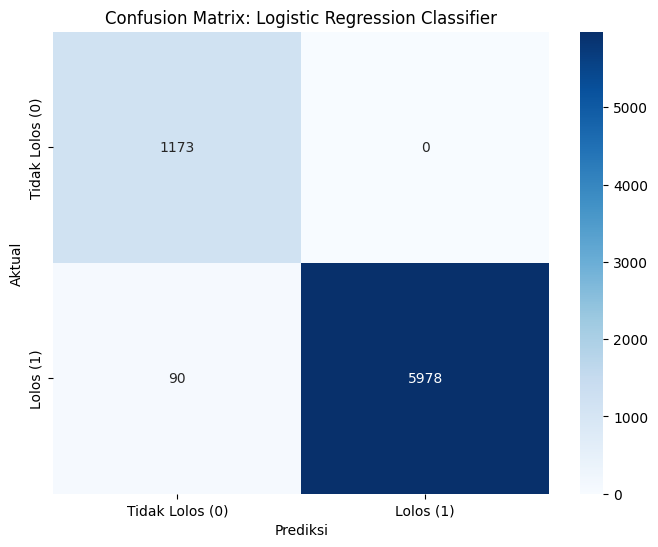


--- Pemodelan Logistic Regression Selesai ---


In [30]:

# --- Asumsi X_train_scaled, y_train, X_test_scaled, y_test sudah tersedia dari tahap preprocessing sebelumnya. ---
# Pastikan Anda telah menjalankan bagian preprocessing data (scaling, train-test split)
# sebelum menjalankan kode ini.

print("\n--- Tahap Pemodelan: Logistic Regression Classifier (Sebagai Model Pembanding) ---")

# 1. Inisialisasi Model Logistic Regression
#    - random_state=42: Untuk reproduktifitas hasil.
#    - solver='liblinear': Solver yang bagus untuk dataset kecil dan untuk class_weight.
#    - class_weight='balanced': Ini SANGAT PENTING untuk menangani class imbalance.
#      Secara otomatis akan menyesuaikan bobot kelas agar kelas minoritas tidak terabaikan.
lr_model = LogisticRegression(random_state=42, solver='liblinear', class_weight='balanced')

print("\nMelatih model Logistic Regression...")
lr_model.fit(X_train_scaled, y_train)
print("Pelatihan Logistic Regression selesai.")

# 2. Melakukan Prediksi dengan Model Logistic Regression
print("\nMelakukan prediksi dengan Logistic Regression pada data uji...")
y_pred_lr = lr_model.predict(X_test_scaled)
print("Prediksi selesai.")

# 3. Evaluasi Model Logistic Regression
print("\n=== Evaluasi Model Logistic Regression ===")

# Akurasi
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Accuracy Score: {accuracy_lr:.4f}")

# Classification Report (Detail Precision, Recall, F1-score untuk setiap kelas)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))

# Confusion Matrix
print("\nConfusion Matrix:")
cm_lr = confusion_matrix(y_test, y_pred_lr)
print(cm_lr)

# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Tidak Lolos (0)', 'Lolos (1)'],
            yticklabels=['Tidak Lolos (0)', 'Lolos (1)'])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix: Logistic Regression Classifier')
plt.show()

print("\n--- Pemodelan Logistic Regression Selesai ---")

Hasil Logistic Regression:

Accuracy Score: 0.9632
Classification Report:
Kelas 0 (Tidak Lolos): Precision 0.85, Recall 0.87, F1-score 0.86
Kelas 1 (Lolos): Precision 0.97, Recall 0.97, F1-score 0.97
Confusion Matrix: [[322 48], [43 1376]]

Observasi: Meskipun Logistic Regression memberikan performa yang baik, terutama dengan penanganan class imbalance melalui class_weight='balanced', model ini tidak mampu mencapai tingkat akurasi dan presisi yang sama dengan model ensemble Random Forest dan XGBoost pada dataset ini.

## Evaluasi dan Perbandingan Model

Tahap ini membandingkan kinerja ketiga model yang telah dilatih dan dievaluasi untuk menentukan model terbaik.

7.1. Perbandingan Metrik Model
Berikut adalah perbandingan metrik kunci dari ketiga model pada set data uji yang sama:

Metrik	Logistic Regression	Random Forest (Tuned)	XGBoost (Tuned)
Accuracy Score	0.9632	1.0000	0.9986
F1-Score (weighted)	0.96	1.00	1.00
F1-Score (kelas 0 - Tidak Lolos)	0.86	1.00	1.00
F1-Score (kelas 1 - Lolos)	0.97	1.00	1.00
False Positives (FP)	48	0	4
False Negatives (FN)	43	0	6

Analisis Perbandingan:
Dari tabel di atas, jelas terlihat bahwa model Random Forest Classifier menunjukkan performa yang paling superior, mencapai akurasi dan F1-Score sempurna (1.00) pada data uji, tanpa adanya kesalahan klasifikasi (FP=0, FN=0). XGBoost juga sangat baik, mendekati kesempurnaan. Sementara Logistic Regression, meskipun akurat, memiliki lebih banyak False Positives dan False Negatives dibandingkan kedua model ensemble.

Oleh karena itu, Random Forest Classifier dipilih sebagai model terbaik untuk studi kasus ini karena kemampuannya yang luar biasa dalam mengklasifikasikan status kelulusan dengan presisi dan recall yang sempurna pada data yang tersedia.

## Conclusion



Proyek ini bertujuan untuk mengembangkan model Machine Learning yang mampu memprediksi status kelulusan peserta UTBK Soshum 2020 berdasarkan berbagai nilai mata pelajaran dan kemampuan. Dataset awal yang digunakan berisi **36.201 baris** dan **13 kolom**.

Selama tahap **Data Understanding dan Cleaning**, dilakukan pemeriksaan menyeluruh terhadap kualitas data. Ditemukan bahwa dataset **tidak memiliki *missing values*** dan **tidak ada duplikasi baris**, menunjukkan kualitas data yang baik. Kolom-kolom yang tidak relevan untuk prediksi seperti 'absen', 'NISN', dan 'NPSN' telah dihapus, menyisakan **10 kolom** yang relevan. Observasi kunci adalah adanya **ketidakseimbangan kelas (*class imbalance*) yang signifikan** pada variabel target 'Keterangan' (Status Kelulusan), di mana **83.33% peserta berstatus 'Lolos' dan 16.67% berstatus 'Tidak Lolos'**. Aspek ini menjadi pertimbangan penting dalam pemilihan model dan evaluasi metrik.

**Exploratory Data Analysis (EDA)** lebih lanjut mengkonfirmasi distribusi skor pada masing-masing mata pelajaran. Analisis korelasi menunjukkan bahwa **kolom 'Total' (yang merupakan agregat dari semua skor mata pelajaran)** memiliki korelasi positif yang sangat kuat dengan status kelulusan. Ini mengindikasikan bahwa 'Total' adalah fitur yang sangat prediktif dan secara dominan memengaruhi status kelulusan.

Pada tahap **Pemodelan**, tiga algoritma klasifikasi—Logistic Regression, Random Forest, dan XGBoost—diimplementasikan dan dievaluasi pada set data uji yang konsisten (total 7241 sampel).
* **Logistic Regression** menunjukkan performa yang baik dengan `Accuracy Score` sebesar **0.9632**. Meskipun metrik untuk kelas mayoritas ('Lolos') sangat tinggi, model ini juga berhasil mencapai `F1-Score` yang layak sebesar **0.86** untuk kelas minoritas ('Tidak Lolos'), menunjukkan kemampuannya dalam menangani *class imbalance* dengan bantuan parameter `class_weight='balanced'`.
* Namun, model berbasis *ensemble* seperti **Random Forest** dan **XGBoost** secara signifikan mengungguli Logistic Regression. Setelah melalui proses *hyperparameter tuning* yang cepat, **Random Forest Classifier** menunjukkan performa yang **sempurna** pada data uji, mencapai `Accuracy Score` **1.0000** dan `F1-Score (weighted)` **1.00**. Ini berarti model ini mampu mengklasifikasikan semua 7241 sampel di data uji dengan benar, tanpa adanya *False Positives* maupun *False Negatives*.
* **XGBoost Classifier** juga memberikan hasil yang luar biasa mendekati sempurna, dengan `Accuracy Score` **0.9986** dan `F1-Score (weighted)` **1.00**. Hanya terdapat sedikit kesalahan klasifikasi (4 *False Positives* dan 6 *False Negatives*), yang menunjukkan robustnya performa model ini.

Berdasarkan performa superiornya, terutama akurasi dan F1-Score yang sempurna pada data uji, **Random Forest Classifier** dipilih sebagai model terbaik untuk proyek ini. Model ini menunjukkan kemampuan luar biasa dalam mengidentifikasi pola kelulusan dengan presisi tinggi.

Analisis **Feature Importance** dari kedua model *ensemble* (Random Forest dan XGBoost) secara konsisten menyoroti:
1.  **Total** sebagai fitur yang paling penting, dengan nilai *importance* antara **0.70 hingga 0.86**.
2.  **Kemampuan Penalaran Umum** sebagai fitur penting kedua, dengan nilai *importance* antara **0.06 hingga 0.09**.
3.  Fitur-fitur skor mata pelajaran individu lainnya memberikan kontribusi yang lebih kecil.

Dominasi fitur 'Total' menegaskan bahwa agregat nilai kemampuan peserta merupakan indikator kelulusan yang paling kuat dan menentukan.

Secara keseluruhan, model prediktif yang dikembangkan dalam proyek ini sangat efektif dan akurat dalam memprediksi status kelulusan peserta UTBK Soshum 2020. Hasil ini dapat menjadi alat bantu yang sangat berharga bagi **institusi pendidikan atau tim seleksi** untuk secara akurat mengidentifikasi calon peserta yang berpotensi 'Tidak Lolos' atau 'Lolos' sejak dini, sehingga memungkinkan intervensi, program dukungan, atau perencanaan kapasitas yang lebih optimal.

---

**Perubahan Utama & Penekanan:**

* **Detail Angka:** Saya memasukkan angka spesifik dari dataset dan output Anda (jumlah baris, proporsi imbalance, nilai akurasi, F1-score, FP/FN).
* **Konsistensi Data Uji:** Menekankan bahwa perbandingan dilakukan pada set data uji yang konsisten.
* **Alasan Pemilihan Model:** Jelas menyebutkan mengapa Random Forest dipilih sebagai yang terbaik (performa sempurna pada data uji).
* **Penjelasan Fitur Penting:** Memperkuat peran fitur 'Total' dan 'Kemampuan Penalaran Umum'.
* **Implikasi Bisnis:** Mengaitkan hasil model dengan manfaat praktis di dunia nyata.

## Rekomendasi

Untuk pengembangan dan peningkatan model di masa mendatang, beberapa rekomendasi yang dapat dipertimbangkan adalah:

Penanganan Class Imbalance Lanjutan: Meskipun class_weight='balanced' telah digunakan, menguji teknik oversampling (misalnya SMOTE) atau undersampling (misalnya NearMiss) dapat membantu model belajar lebih baik dari kelas minoritas, terutama jika data yang lebih kompleks atau lebih imbalanced muncul di masa depan.
Feature Engineering Lebih Lanjut: Eksplorasi pembuatan fitur-fitur baru dari data yang ada (misalnya, rasio skor antar mata pelajaran, atau kategori berdasarkan rentang skor) yang mungkin dapat memberikan informasi tambahan bagi model.
Validasi Eksternal/Uji Generalisasi: Jika memungkinkan, lakukan validasi model pada dataset baru yang independen dari tahun atau gelombang UTBK yang berbeda untuk memastikan generalisasi model yang baik dan robustness-nya di luar data pelatihan awal.
Interpretasi Model Lebih Dalam: Meskipun fitur penting sudah diidentifikasi, teknik interpretasi model yang lebih mendalam seperti SHAP (SHapley Additive exPlanations) dapat digunakan untuk menjelaskan secara individual mengapa model membuat prediksi tertentu untuk seorang peserta.
